 ### Desafio Final / Modelado

### Grupo 7: Leonardo Campos, Marcos Garcia Verdier, Juan Molinari, Barbara Malamud

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv ('data_set_final.csv')
df

,Unnamed: 0,code,Provincia_x,Localidad_x,Operador_x,Bandera_x,AVG,Longitud,Latitud,ruta,...,gid,cod_ruta,valor,sentido,color,id_distrit,tmda17,etiqueta,eess_por_tramo,longitud_tramo
0,1,102,BUENOS AIRES,AZUL,M.P.C.I. S.A.,PETROBRAS,127.744999,-59.834700,-36.788170,3,...,75,3,8100,A,15985925,1,8100,0,3,0.192534
1,3,105,CORDOBA,RIO CUARTO,LAS SIERRAS S.R.L,YPF,730.136832,-64.339980,-33.081140,36,...,1184,A005,12000,A,16450585,2,12000,1,3,0.059299
2,11,119,RIO NEGRO,CHOELE CHOEL,GUSTAVO JULIAN Y MIGUEL A ZUAIN,AXION,95.933333,-65.670660,-39.271210,22,...,465,22,3050,A,2751236,20,3050,0,3,4.562039
3,14,125,MENDOZA,SAN RAFAEL,LOS PUENTES SRL,YPF,480.005254,-68.380280,-34.651590,144,...,931,144,1360,A,2751236,4,1360,0,1,1.633931
4,15,126,NEUQUEN,SAN MARTIN DE LOS ANDES,LA VEGA S.A.,YPF,791.144329,-71.287960,-40.136410,234,...,691,40,1160,A,2751236,13,1160,1,1,5.860262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,4454,9547,CORRIENTES,VIRASORO,GNP SRL,BLANCA,373.939833,-56.015440,-28.025357,14,...,375,14,3611,A,2751236,10,3611,0,1,0.944237
627,4456,9555,RIO NEGRO,CHIMPAY,GLOBAL OIL SRL,YPF,235.592825,-66.138590,-39.162380,22,...,465,22,3050,A,2751236,20,3050,0,3,4.562039
628,4488,9607,BUENOS AIRES,DON TORCUATO,TRAFIGURA ARGENTINA S.A.,PUMA,72.590000,-58.615328,-34.485930,202,...,284,9,228044,A,16450585,1,228044,0,4,0.063397
629,4507,9657,CORDOBA,SAMPACHO,PETROL SUR S.A.,PUMA,364.494919,-64.732853,-33.397025,8,...,172,8,4588,A,15985925,2,4588,0,1,1.659364


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 29 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Unnamed: 0                                        631 non-null    int64  
 1   code                                              631 non-null    int64  
 2   Provincia_x                                       631 non-null    object 
 3   Localidad_x                                       631 non-null    object 
 4   Operador_x                                        631 non-null    object 
 5   Bandera_x                                         631 non-null    object 
 6   AVG                                               631 non-null    float64
 7   Longitud                                          631 non-null    float64
 8   Latitud                                           631 non-null    float64
 9   ruta                 

In [4]:
df = df.rename(columns={'TotalHectareassembradasOleaginosa07-2017&06-2018': 'Hectsembradas'})

In [5]:
df.columns

Index(['Unnamed: 0', 'code', 'Provincia_x', 'Localidad_x', 'Operador_x',
       'Bandera_x', 'AVG', 'Longitud', 'Latitud', 'ruta',
       'Maximo Precio 2019 Super', '2013 - 2014', '2014 - 2015', '2015 - 2016',
       'Hectsembradas', 'Superficie (km²)', 'Poblacion', 'geometry',
       'index_right', 'gid', 'cod_ruta', 'valor', 'sentido', 'color',
       'id_distrit', 'tmda17', 'etiqueta', 'eess_por_tramo', 'longitud_tramo'],
      dtype='object')

In [6]:
df.drop(columns=['Unnamed: 0','valor','color','index_right','id_distrit'], inplace=True)

In [7]:
df.columns

Index(['code', 'Provincia_x', 'Localidad_x', 'Operador_x', 'Bandera_x', 'AVG',
       'Longitud', 'Latitud', 'ruta', 'Maximo Precio 2019 Super',
       '2013 - 2014', '2014 - 2015', '2015 - 2016', 'Hectsembradas',
       'Superficie (km²)', 'Poblacion', 'geometry', 'gid', 'cod_ruta',
       'sentido', 'tmda17', 'etiqueta', 'eess_por_tramo', 'longitud_tramo'],
      dtype='object')

## Analisis Exploratorio

# Correlacion de TMDA anual con variable objetivo

In [8]:
df.corr()

,code,AVG,Longitud,Latitud,ruta,Maximo Precio 2019 Super,2013 - 2014,2014 - 2015,2015 - 2016,Hectsembradas,Superficie (km²),Poblacion,gid,tmda17,etiqueta,eess_por_tramo,longitud_tramo
code,1.000000,-0.101824,-0.009076,0.028982,-0.011679,-0.027972,-0.018004,-0.005952,0.008400,-0.046344,-0.066079,-0.050883,0.098455,0.019811,-0.098532,0.015875,-0.033723
AVG,-0.101824,1.000000,-0.092991,-0.203367,0.062125,-0.107587,-0.006450,-0.012953,-0.018080,0.010684,0.094552,0.026333,-0.131744,0.068802,0.772304,-0.032722,-0.006682
Longitud,-0.009076,-0.092991,1.000000,0.361758,-0.003040,0.296174,-0.046253,-0.034765,-0.028098,0.240955,0.035679,0.298336,-0.193852,0.178522,-0.046421,0.177293,-0.340861
Latitud,0.028982,-0.203367,0.361758,1.000000,0.002214,0.431096,0.233515,0.258703,0.330623,-0.290762,-0.521229,-0.328207,0.105271,-0.083642,-0.182050,0.055507,-0.128870
ruta,-0.011679,0.062125,-0.003040,0.002214,1.000000,-0.006832,0.004042,0.007276,0.011232,-0.003216,0.015022,0.008874,0.103373,0.051730,0.063793,-0.071974,-0.046453
Maximo Precio 2019 Super,-0.027972,-0.107587,0.296174,0.431096,-0.006832,1.000000,0.007258,-0.055023,-0.037885,0.103083,-0.079055,0.053628,0.022293,-0.080675,-0.131768,0.076362,-0.157378
2013 - 2014,-0.018004,-0.006450,-0.046253,0.233515,0.004042,0.007258,1.000000,0.392091,0.408382,-0.381873,-0.290574,-0.228949,-0.072327,-0.067317,-0.011717,-0.108454,0.043217
2014 - 2015,-0.005952,-0.012953,-0.034765,0.258703,0.007276,-0.055023,0.392091,1.000000,0.958459,-0.606404,-0.360553,-0.360330,-0.019468,-0.107262,0.020081,-0.080712,0.151897
2015 - 2016,0.008400,-0.018080,-0.028098,0.330623,0.011232,-0.037885,0.408382,0.958459,1.000000,-0.565575,-0.343269,-0.320595,0.001623,-0.094192,0.015045,-0.141290,0.093444
Hectsembradas,-0.046344,0.010684,0.240955,-0.290762,-0.003216,0.103083,-0.381873,-0.606404,-0.565575,1.000000,0.814822,0.881755,-0.088379,0.290360,0.012731,-0.034009,-0.290306


# Correlacion del parque automotor con la variable objetivo

In [9]:
df[['2013 - 2014', '2014 - 2015', '2015 - 2016','etiqueta']].corr()

,2013 - 2014,2014 - 2015,2015 - 2016,etiqueta
2013 - 2014,1.000000,0.392091,0.408382,-0.011717
2014 - 2015,0.392091,1.000000,0.958459,0.020081
2015 - 2016,0.408382,0.958459,1.000000,0.015045
etiqueta,-0.011717,0.020081,0.015045,1.000000


# En que provincias y localidades están las estaciones

In [10]:
import matplotlib.pyplot as plt

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 <a list of 23 Text xticklabel objects>)

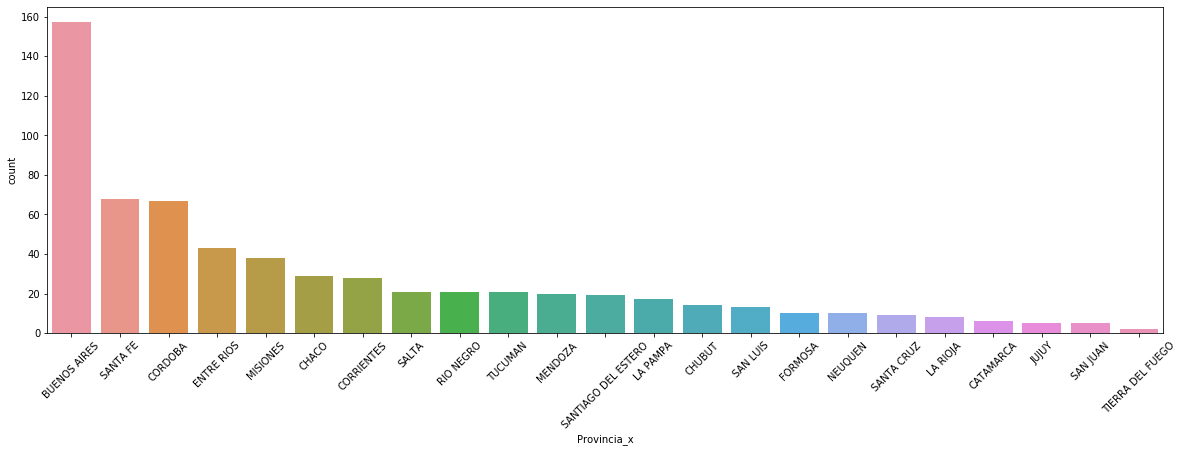

In [11]:
plt.figure(figsize=(20, 6))
sns.countplot(df['Provincia_x'], order = df['Provincia_x'].value_counts().index)
plt.xticks(rotation=45)

# VOLUMEN POR PROVINCIA 2019

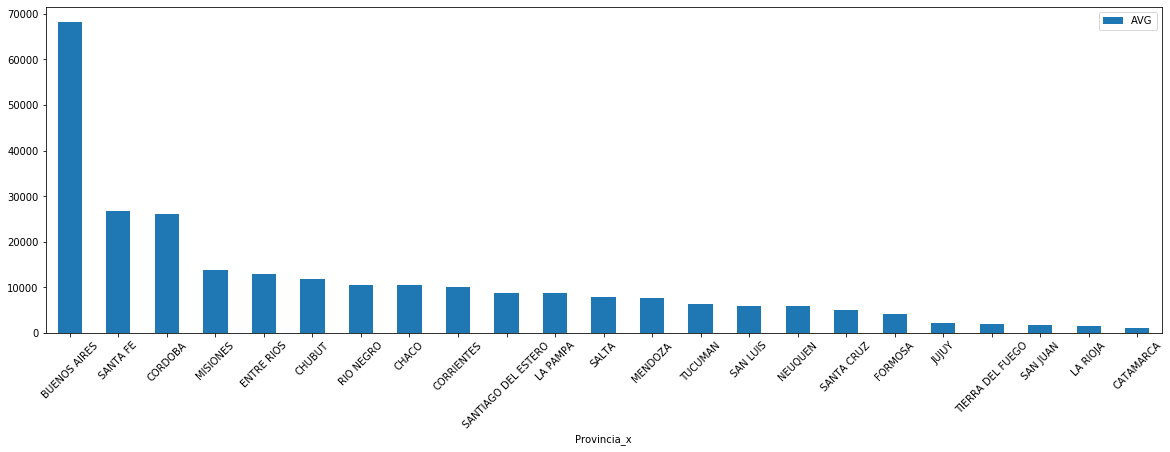

In [12]:
volumen_provincia_2019=df.groupby(['Provincia_x'])[['AVG']].apply(lambda x: x.sum()).sort_values('AVG', ascending=False)
ax = volumen_provincia_2019.plot(kind='bar', figsize=(20,6), fontsize=10)
plt.xticks(rotation=45)
plt.show()
# buscar top 30

## VOLUMEN POR Localidad 2019

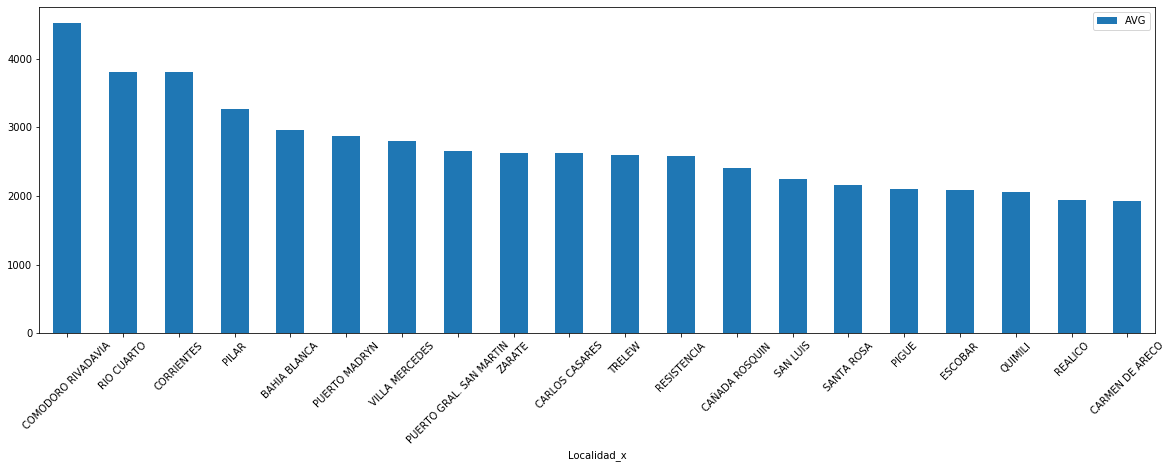

In [13]:
volumen_localidad_2019=df.groupby(['Localidad_x'])[['AVG']].apply(lambda x: x.sum()).sort_values('AVG', ascending=False).head(20)
ax = volumen_localidad_2019.plot(kind='bar', figsize=(20,6), fontsize=10)
plt.xticks(rotation=45)
plt.show()

# Cantidad de estaciones por tramo

[Text(0, 0, '75'),
 Text(0, 0, '1184'),
 Text(0, 0, '465'),
 Text(0, 0, '931'),
 Text(0, 0, '691'),
 Text(0, 0, '1107'),
 Text(0, 0, '467'),
 Text(0, 0, '178'),
 Text(0, 0, '280'),
 Text(0, 0, '129'),
 Text(0, 0, '1106'),
 Text(0, 0, '125'),
 Text(0, 0, '576'),
 Text(0, 0, '1075'),
 Text(0, 0, '566'),
 Text(0, 0, '342'),
 Text(0, 0, '549'),
 Text(0, 0, '354'),
 Text(0, 0, '737'),
 Text(0, 0, '165')]

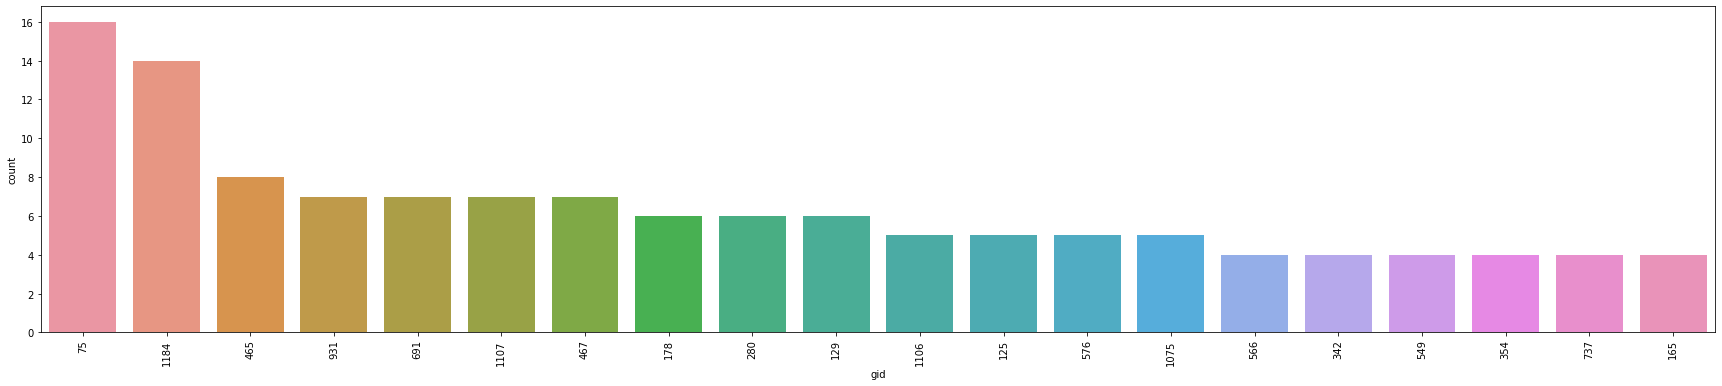

In [14]:
plt.figure(figsize=(30, 6))
chart=sns.countplot(df['gid'], order = df['gid'].value_counts().iloc[:20].index)
xlabel=df['gid'].unique()
chart.set_xticklabels(xlabel,rotation=90)

# Cantidad de estaciones por bandera

[Text(0, 0, 'PETROBRAS'),
 Text(0, 0, 'YPF'),
 Text(0, 0, 'AXION'),
 Text(0, 0, 'BLANCA'),
 Text(0, 0, 'SHELL C.A.P.S.A.'),
 Text(0, 0, 'OIL COMBUSTIBLES S.A.'),
 Text(0, 0, 'ESSO PETROLERA ARGENTINA S.R.L'),
 Text(0, 0, 'SOL PETROLEO'),
 Text(0, 0, 'REFINOR'),
 Text(0, 0, 'Pampa Energia'),
 Text(0, 0, 'ASPRO'),
 Text(0, 0, 'PUMA'),
 Text(0, 0, 'PDV sur')]

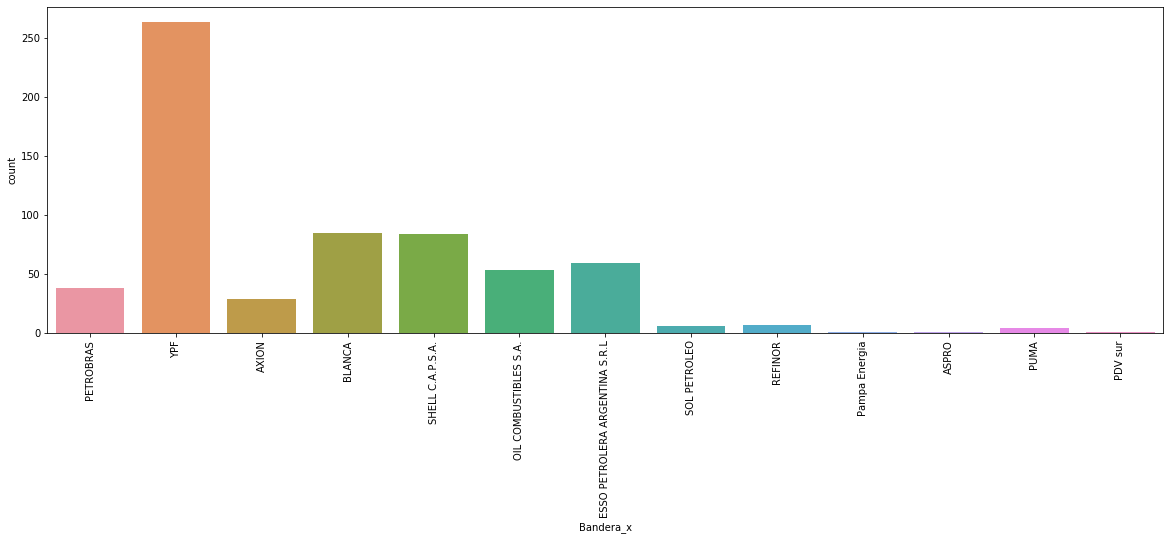

In [15]:
plt.figure(figsize=(20, 6))
chart=sns.countplot(df['Bandera_x'])
xlabel=df['Bandera_x'].unique()
chart.set_xticklabels(xlabel,rotation=90)

In [16]:
df['Bandera_x'].describe()

count     631
unique     13
top       YPF
freq      263
Name: Bandera_x, dtype: object

# AVG por Ruta

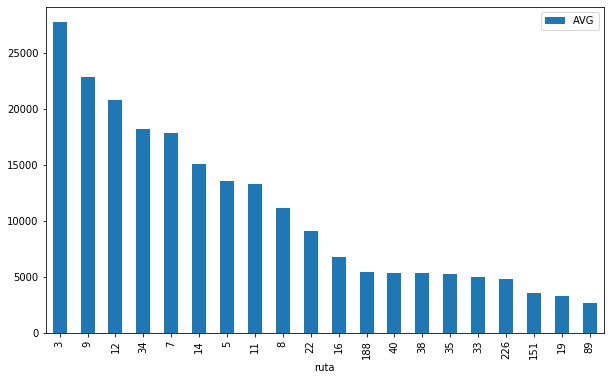

In [17]:
volumen_ruta_2019=df.groupby(['ruta'])[['AVG']].apply(lambda x: x.sum()).sort_values('AVG', ascending=False).head(20)
ax = volumen_ruta_2019.plot(kind='bar', figsize=(10,6), fontsize=10)
plt.xticks(rotation=90)
plt.show()

# Distribucion de KPIs 

## TMDA transito

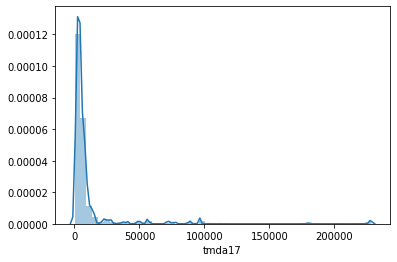

In [18]:
sns.distplot(df['tmda17'])

## Longitud del tramo

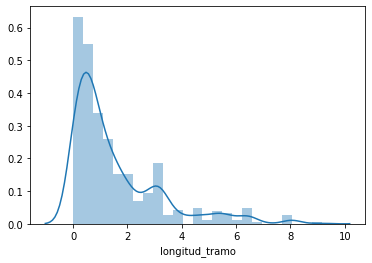

In [19]:
sns.distplot(df['longitud_tramo'])

# distribucion por siembra

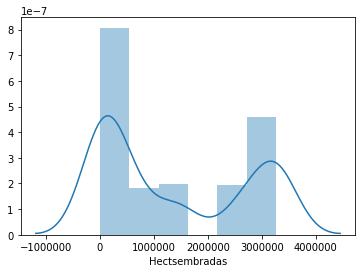

In [20]:
sns.distplot(df['Hectsembradas'])

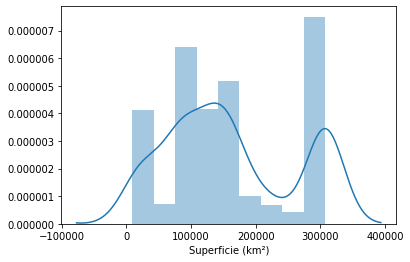

In [21]:
sns.distplot(df['Superficie (km²)'])

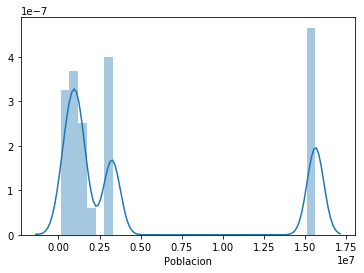

In [22]:
sns.distplot(df['Poblacion'])

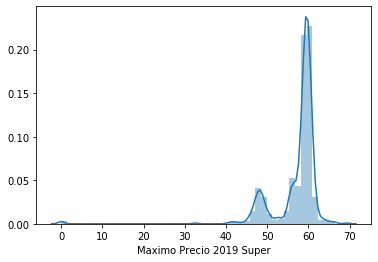

In [23]:
sns.distplot(df['Maximo Precio 2019 Super'])

# Distribucion de volumen de ventas por año

# 2019

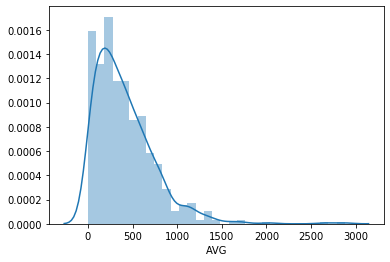

In [24]:
sns.distplot(df['AVG'])

# Cuartiles por volumen de ventas

In [25]:
df['cuartil_vol_ventas']=pd.qcut(x=df['AVG'],q=4)
df.head(5)

,code,Provincia_x,Localidad_x,Operador_x,Bandera_x,AVG,Longitud,Latitud,ruta,Maximo Precio 2019 Super,...,Poblacion,geometry,gid,cod_ruta,sentido,tmda17,etiqueta,eess_por_tramo,longitud_tramo,cuartil_vol_ventas
0,102,BUENOS AIRES,AZUL,M.P.C.I. S.A.,PETROBRAS,127.744999,-59.83470,-36.78817,3,57.509998,...,15625084,POLYGON ((-59.83140361363141 -36.7880227969764...,75,3,A,8100,0,3,0.192534,"(0.0, 170.401]"
1,105,CORDOBA,RIO CUARTO,LAS SIERRAS S.R.L,YPF,730.136832,-64.33998,-33.08114,36,59.340000,...,3308876,POLYGON ((-64.33668361363139 -33.0809927969771...,1184,A005,A,12000,1,3,0.059299,"(580.146, 2876.936]"
2,119,RIO NEGRO,CHOELE CHOEL,GUSTAVO JULIAN Y MIGUEL A ZUAIN,AXION,95.933333,-65.67066,-39.27121,22,47.980000,...,638645,POLYGON ((-65.66736361363138 -39.2710627969771...,465,22,A,3050,0,3,4.562039,"(0.0, 170.401]"
3,125,MENDOZA,SAN RAFAEL,LOS PUENTES SRL,YPF,480.005254,-68.38028,-34.65159,144,56.290001,...,1738929,POLYGON ((-68.37698361363138 -34.6514427969771...,931,144,A,1360,0,1,1.633931,"(342.798, 580.146]"
4,126,NEUQUEN,SAN MARTIN DE LOS ANDES,LA VEGA S.A.,YPF,791.144329,-71.28796,-40.13641,234,47.540001,...,551266,POLYGON ((-71.28466361363138 -40.1362627969771...,691,40,A,1160,1,1,5.860262,"(580.146, 2876.936]"


[Text(0, 0, '(0.0, 170.401]'),
 Text(0, 0, '(580.146, 2876.936]'),
 Text(0, 0, '(342.798, 580.146]'),
 Text(0, 0, '(170.401, 342.798]')]

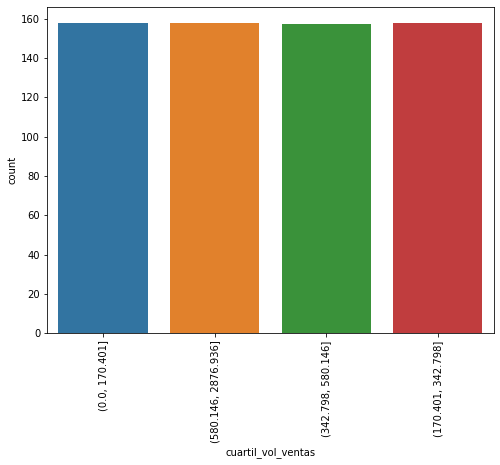

In [26]:
plt.figure(figsize=(8, 6))
chart=sns.countplot(df['cuartil_vol_ventas'])
xlabel=df['cuartil_vol_ventas'].unique()
chart.set_xticklabels(xlabel,rotation=90)
### no se que esta mal

# Scatters con KPIs diferenciados por cuartil de volumen de ventas

## TMDA por estacion

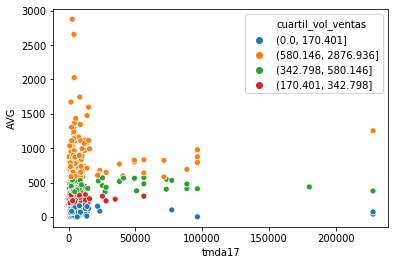

In [27]:
y=df['AVG']
x=df['tmda17']
sns.scatterplot(x=x,y=y,hue=df['cuartil_vol_ventas'])

##  Estaciones por poblacion

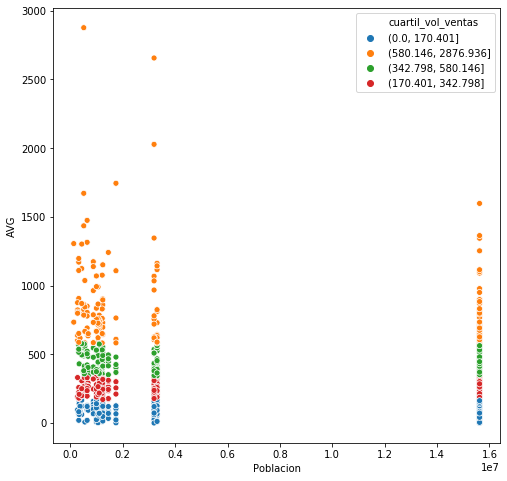

In [28]:
y=df['AVG'] 
x=df['Poblacion']
plt.rcParams['figure.figsize']=(8,8)
sns.scatterplot(x=x,y=y,hue=df['cuartil_vol_ventas'])

## Longitud del tramo 

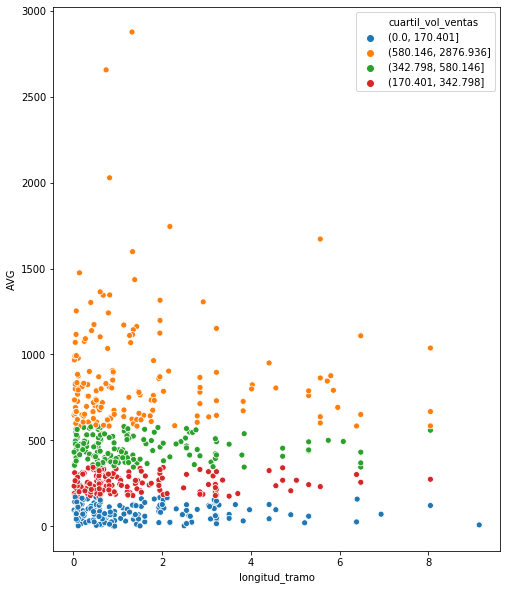

In [29]:
y=df['AVG']
x=df['longitud_tramo']
plt.rcParams['figure.figsize']=(8,10)
sns.scatterplot(x=x,y=y,hue=df['cuartil_vol_ventas'])

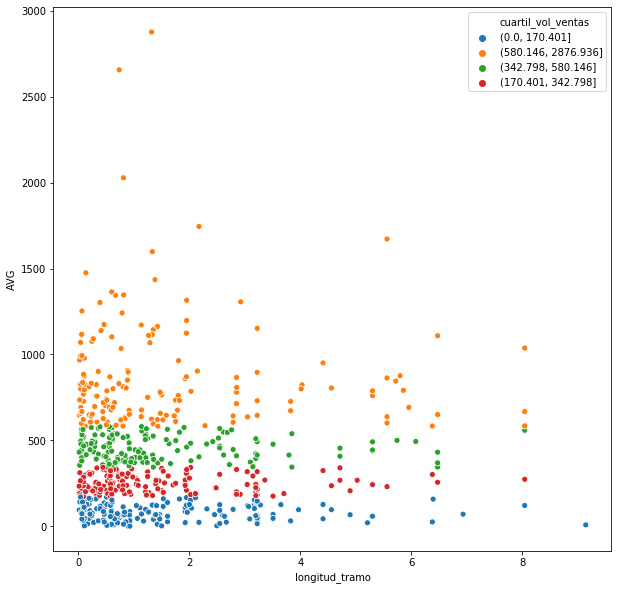

In [30]:
y=df['AVG']
x=df['longitud_tramo']
plt.rcParams['figure.figsize']=(10,10)
sns.scatterplot(x=x,y=y,hue=df['cuartil_vol_ventas'])

# Scatters con KPIs diferenciados por Bandera

## TMDA por estacion

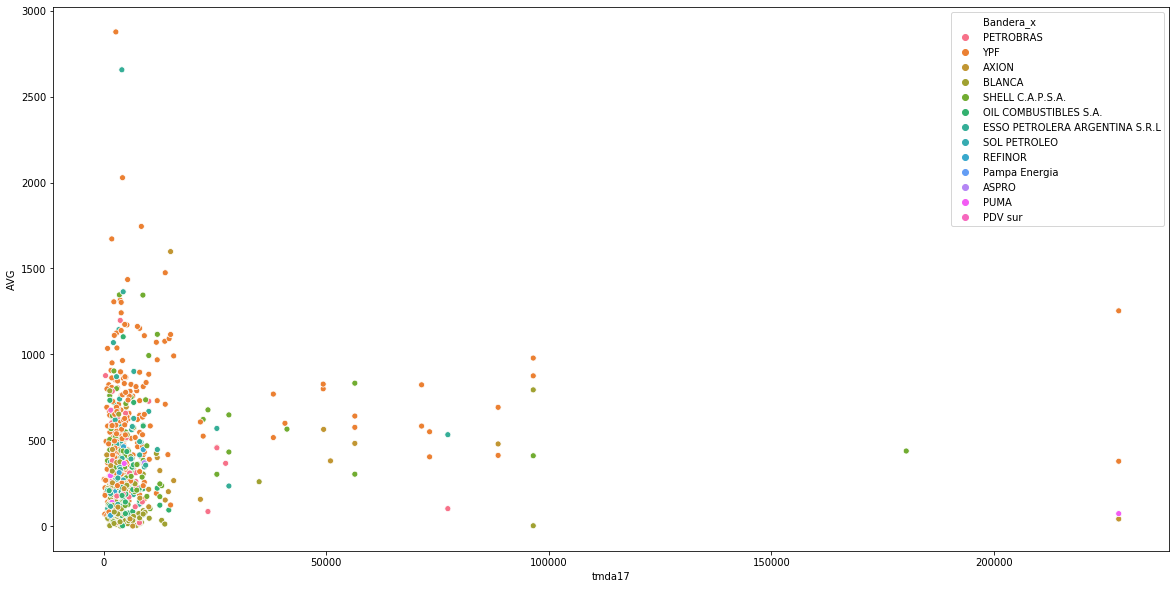

In [31]:
y=df['AVG']
x=df['tmda17']
plt.rcParams['figure.figsize']=(20,10)
sns.scatterplot(x=x,y=y,hue=df['Bandera_x'])

## Longitud del tramo

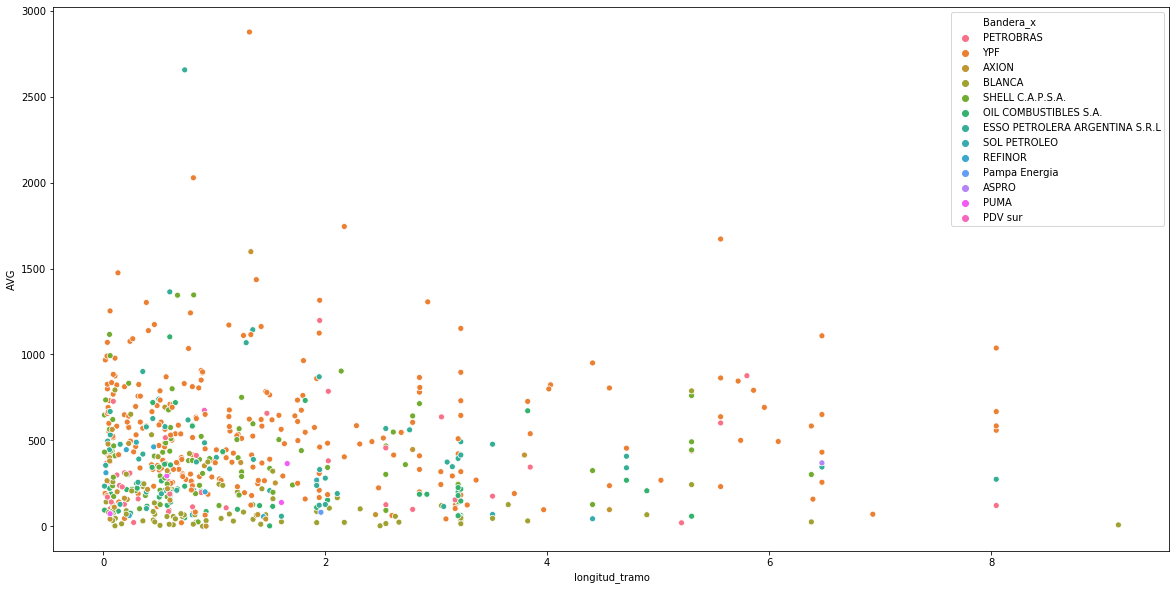

In [32]:
y=df['AVG']
x=df['longitud_tramo']
sns.scatterplot(x=x,y=y,hue=df['Bandera_x'])

# Volumen mensual promedio por estacion y bandera

# 2019

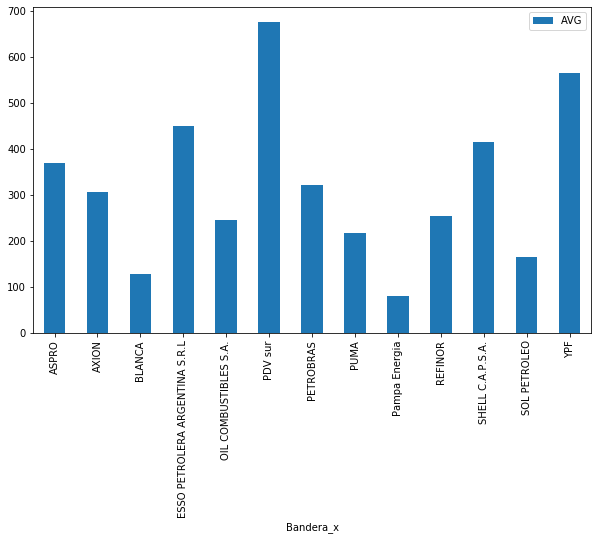

In [33]:
volumen_bandera=df.groupby(['Bandera_x'])[['AVG']].apply(lambda x: x.mean())
ax = volumen_bandera.plot(kind='bar', figsize=(10,6), fontsize=10)
plt.show()

# Crecimiento del Parque automotor por provincia

# 2013 - 2014

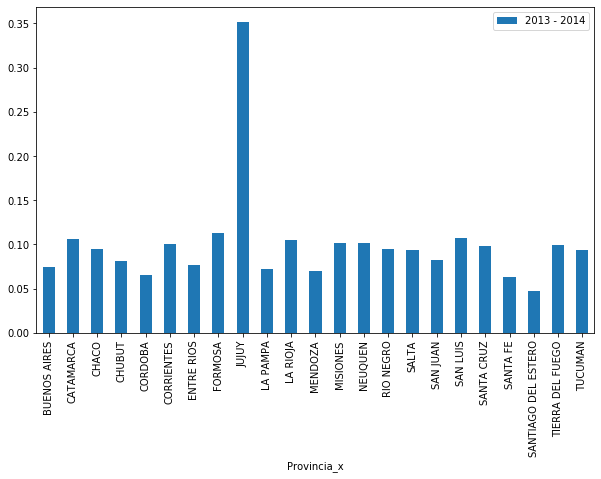

In [34]:
parq_prov=df.groupby(['Provincia_x'])[['2013 - 2014']].apply(lambda x: x.mean())
ax = parq_prov.plot(kind='bar', figsize=(10,6), fontsize=10)
plt.show()

# 2014 - 2015

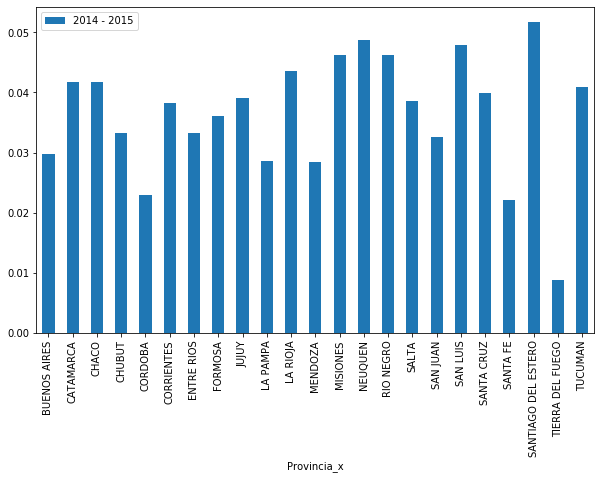

In [35]:
parq_prov=df.groupby(['Provincia_x'])[['2014 - 2015']].apply(lambda x: x.mean())
ax = parq_prov.plot(kind='bar', figsize=(10,6), fontsize=10)
plt.show()

# 2015 - 2016

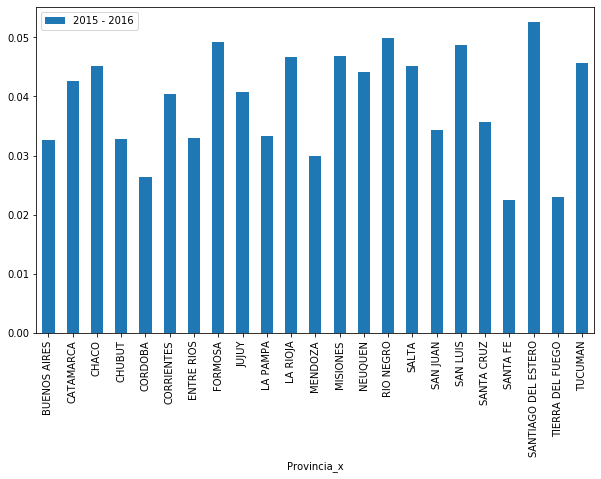

In [36]:
parq_prov=df.groupby(['Provincia_x'])[['2015 - 2016']].apply(lambda x: x.mean())
ax = parq_prov.plot(kind='bar', figsize=(10,6), fontsize=10)
plt.show()

# Scatters de variable objetivo y TMDA por año 

# 2018

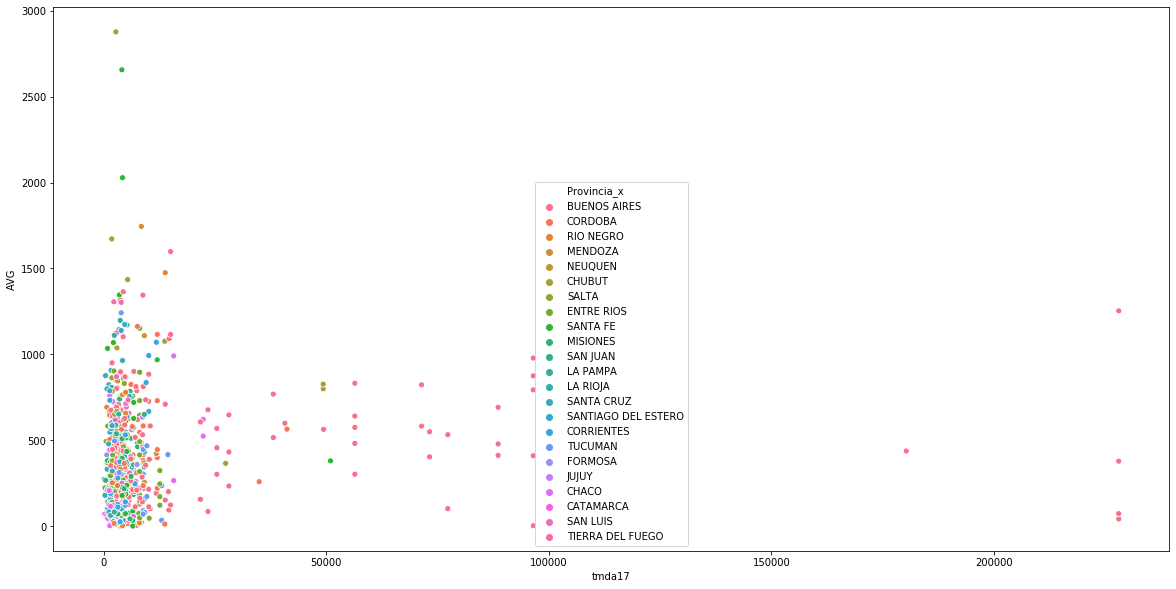

In [37]:
y=df['AVG']
x=df['tmda17']
sns.scatterplot(x=x,y=y,hue=df['Provincia_x'])

# Dummies para las columnas Bandera y Tramo (nombre)

In [38]:
import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [39]:
dummies_banderas=pd.get_dummies(data=df['Bandera_x'])

In [40]:
dummies_banderas

,ASPRO,AXION,BLANCA,ESSO PETROLERA ARGENTINA S.R.L,OIL COMBUSTIBLES S.A.,PDV sur,PETROBRAS,PUMA,Pampa Energia,REFINOR,SHELL C.A.P.S.A.,SOL PETROLEO,YPF
0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,0,0,1,0,0,0,0,0,0,0,0,0,0
627,0,0,0,0,0,0,0,0,0,0,0,0,1
628,0,0,0,0,0,0,0,1,0,0,0,0,0
629,0,0,0,0,0,0,0,1,0,0,0,0,0


In [41]:
precio_bandera=pd.concat([df['MaximoPrecio2019Super'],dummies_banderas,],axis=1)
precio_bandera.corr()

,MaximoPrecio2019Super,ASPRO,AXION,BLANCA,ESSO PETROLERA ARGENTINA S.R.L,OIL COMBUSTIBLES S.A.,PDV sur,PETROBRAS,PUMA,Pampa Energia,REFINOR,SHELL C.A.P.S.A.,SOL PETROLEO,YPF
MaximoPrecio2019Super,1.000000,-0.014118,-0.012004,-0.028179,0.056297,0.088254,0.003339,-0.190803,0.022370,-0.063976,0.035822,0.118546,0.000650,-0.053205
ASPRO,-0.014118,1.000000,-0.008744,-0.015720,-0.012796,-0.012064,-0.001587,-0.010085,-0.003182,-0.001587,-0.004220,-0.015613,-0.003904,-0.033681
AXION,-0.012004,-0.008744,1.000000,-0.086599,-0.070490,-0.066462,-0.008744,-0.055560,-0.017531,-0.008744,-0.023246,-0.086010,-0.021505,-0.185547
BLANCA,-0.028179,-0.015720,-0.086599,1.000000,-0.126719,-0.119478,-0.015720,-0.099880,-0.031514,-0.015720,-0.041790,-0.154618,-0.038659,-0.333555
ESSO PETROLERA ARGENTINA S.R.L,0.056297,-0.012796,-0.070490,-0.126719,1.000000,-0.097253,-0.012796,-0.081300,-0.025652,-0.012796,-0.034016,-0.125856,-0.031468,-0.271508
OIL COMBUSTIBLES S.A.,0.088254,-0.012064,-0.066462,-0.119478,-0.097253,1.000000,-0.012064,-0.076655,-0.024186,-0.012064,-0.032072,-0.118664,-0.029669,-0.255993
PDV sur,0.003339,-0.001587,-0.008744,-0.015720,-0.012796,-0.012064,1.000000,-0.010085,-0.003182,-0.001587,-0.004220,-0.015613,-0.003904,-0.033681
PETROBRAS,-0.190803,-0.010085,-0.055560,-0.099880,-0.081300,-0.076655,-0.010085,1.000000,-0.020219,-0.010085,-0.026812,-0.099200,-0.024803,-0.214002
PUMA,0.022370,-0.003182,-0.017531,-0.031514,-0.025652,-0.024186,-0.003182,-0.020219,1.000000,-0.003182,-0.008460,-0.031300,-0.007826,-0.067523
Pampa Energia,-0.063976,-0.001587,-0.008744,-0.015720,-0.012796,-0.012064,-0.001587,-0.010085,-0.003182,1.000000,-0.004220,-0.015613,-0.003904,-0.033681


In [42]:
dummies_tramos=pd.get_dummies(data=df['gid'])
dummies_tramos

,14,23,26,29,32,34,38,41,42,47,...,1144,1145,1146,1148,1182,1183,1184,1185,1201,1207
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
627,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
628,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
629,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
dummies_provincia=pd.get_dummies(data=df['Provincia_x'])
dummies_provincia

,BUENOS AIRES,CATAMARCA,CHACO,CHUBUT,CORDOBA,CORRIENTES,ENTRE RIOS,FORMOSA,JUJUY,LA PAMPA,...,NEUQUEN,RIO NEGRO,SALTA,SAN JUAN,SAN LUIS,SANTA CRUZ,SANTA FE,SANTIAGO DEL ESTERO,TIERRA DEL FUEGO,TUCUMAN
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
627,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
628,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
629,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df1=pd.concat([df,dummies_banderas,dummies_tramos,dummies_provincia ],axis=1)
df1

,code,Provincia_x,Localidad_x,Operador_x,Bandera_x,AVG,Longitud,Latitud,ruta,MaximoPrecio2019Super,...,NEUQUEN,RIO NEGRO,SALTA,SAN JUAN,SAN LUIS,SANTA CRUZ,SANTA FE,SANTIAGO DEL ESTERO,TIERRA DEL FUEGO,TUCUMAN
0,102,BUENOS AIRES,AZUL,M.P.C.I. S.A.,PETROBRAS,127.744999,-59.834700,-36.788170,3,57.509998,...,0,0,0,0,0,0,0,0,0,0
1,105,CORDOBA,RIO CUARTO,LAS SIERRAS S.R.L,YPF,730.136832,-64.339980,-33.081140,36,59.340000,...,0,0,0,0,0,0,0,0,0,0
2,119,RIO NEGRO,CHOELE CHOEL,GUSTAVO JULIAN Y MIGUEL A ZUAIN,AXION,95.933333,-65.670660,-39.271210,22,47.980000,...,0,1,0,0,0,0,0,0,0,0
3,125,MENDOZA,SAN RAFAEL,LOS PUENTES SRL,YPF,480.005254,-68.380280,-34.651590,144,56.290001,...,0,0,0,0,0,0,0,0,0,0
4,126,NEUQUEN,SAN MARTIN DE LOS ANDES,LA VEGA S.A.,YPF,791.144329,-71.287960,-40.136410,234,47.540001,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,9547,CORRIENTES,VIRASORO,GNP SRL,BLANCA,373.939833,-56.015440,-28.025357,14,59.590000,...,0,0,0,0,0,0,0,0,0,0
627,9555,RIO NEGRO,CHIMPAY,GLOBAL OIL SRL,YPF,235.592825,-66.138590,-39.162380,22,47.540001,...,0,1,0,0,0,0,0,0,0,0
628,9607,BUENOS AIRES,DON TORCUATO,TRAFIGURA ARGENTINA S.A.,PUMA,72.590000,-58.615328,-34.485930,202,55.279999,...,0,0,0,0,0,0,0,0,0,0
629,9657,CORDOBA,SAMPACHO,PETROL SUR S.A.,PUMA,364.494919,-64.732853,-33.397025,8,59.990002,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df1=df1.iloc[:,5:]
df1.head(5)

,AVG,Longitud,Latitud,ruta,MaximoPrecio2019Super,20132014,20142015,20152016,Hectsembradas,Superficiekm,...,NEUQUEN,RIO NEGRO,SALTA,SAN JUAN,SAN LUIS,SANTA CRUZ,SANTA FE,SANTIAGO DEL ESTERO,TIERRA DEL FUEGO,TUCUMAN
0,127.744999,-59.83470,-36.78817,3,57.509998,0.074044,0.029770,0.032685,3263625.67,307571,...,0,0,0,0,0,0,0,0,0,0
1,730.136832,-64.33998,-33.08114,36,59.340000,0.065797,0.022939,0.026363,2648963.68,165321,...,0,0,0,0,0,0,0,0,0,0
2,95.933333,-65.67066,-39.27121,22,47.980000,0.094436,0.046286,0.049967,2574.90,203013,...,0,1,0,0,0,0,0,0,0,0
3,480.005254,-68.38028,-34.65159,144,56.290001,0.069841,0.028409,0.029919,385.85,148827,...,0,0,0,0,0,0,0,0,0,0
4,791.144329,-71.28796,-40.13641,234,47.540001,0.101836,0.048659,0.044052,30.75,94078,...,1,0,0,0,0,0,0,0,0,0


In [46]:
prediction=df1.iloc[620:]
prediction

,AVG,Longitud,Latitud,ruta,MaximoPrecio2019Super,20132014,20142015,20152016,Hectsembradas,Superficiekm,...,NEUQUEN,RIO NEGRO,SALTA,SAN JUAN,SAN LUIS,SANTA CRUZ,SANTA FE,SANTIAGO DEL ESTERO,TIERRA DEL FUEGO,TUCUMAN
620,446.296668,-62.679427,-39.536675,3,46.689999,0.074044,0.029770,0.032685,3263625.67,307571,...,0,0,0,0,0,0,0,0,0,0
621,415.946000,-65.378654,-27.038045,38,60.240002,0.093300,0.040977,0.045670,102155.15,22524,...,0,0,0,0,0,0,0,0,0,1
622,162.780666,-59.823418,-36.776943,3,59.389999,0.074044,0.029770,0.032685,3263625.67,307571,...,0,0,0,0,0,0,0,0,0,0
623,1110.176582,-64.253361,-35.053321,188,48.990002,0.072495,0.028545,0.033351,307862.70,14344,...,0,0,0,0,0,0,0,0,0,0
624,11.853333,-64.367920,-33.159860,8,61.070000,0.065797,0.022939,0.026363,2648963.68,165321,...,0,0,0,0,0,0,0,0,0,0
625,264.733332,-58.970468,-27.412923,16,59.240002,0.094349,0.041740,0.045151,244040.24,99633,...,0,0,0,0,0,0,0,0,0,0
626,373.939833,-56.015440,-28.025357,14,59.590000,0.100988,0.038244,0.040429,37190.70,88199,...,0,0,0,0,0,0,0,0,0,0
627,235.592825,-66.138590,-39.162380,22,47.540001,0.094436,0.046286,0.049967,2574.90,203013,...,0,1,0,0,0,0,0,0,0,0
628,72.590000,-58.615328,-34.485930,202,55.279999,0.074044,0.029770,0.032685,3263625.67,307571,...,0,0,0,0,0,0,0,0,0,0
629,364.494919,-64.732853,-33.397025,8,59.990002,0.065797,0.022939,0.026363,2648963.68,165321,...,0,0,0,0,0,0,0,0,0,0


In [47]:
prediction['etiqueta']

620    0
621    0
622    0
623    1
624    0
625    0
626    0
627    0
628    0
629    0
630    0
Name: etiqueta, dtype: int64

In [48]:
df1=df1.iloc[:620,:]
df1.tail()

,AVG,Longitud,Latitud,ruta,MaximoPrecio2019Super,20132014,20142015,20152016,Hectsembradas,Superficiekm,...,NEUQUEN,RIO NEGRO,SALTA,SAN JUAN,SAN LUIS,SANTA CRUZ,SANTA FE,SANTIAGO DEL ESTERO,TIERRA DEL FUEGO,TUCUMAN
615,563.081665,-58.187901,-34.840495,36,55.840000,0.074044,0.029770,0.032685,3263625.67,307571,...,0,0,0,0,0,0,0,0,0,0
616,62.439334,-67.023922,-29.314364,75,58.939999,0.104495,0.043518,0.046742,454.60,8968,...,0,0,0,0,0,0,0,0,0,0
617,70.244918,-65.552252,-27.268545,38,58.189999,0.093300,0.040977,0.045670,102155.15,22524,...,0,0,0,0,0,0,0,0,0,1
618,467.420829,-65.399233,-27.064030,38,60.240002,0.093300,0.040977,0.045670,102155.15,22524,...,0,0,0,0,0,0,0,0,0,1
619,70.832500,-55.840250,-27.461495,12,61.873001,0.101571,0.046251,0.046823,11278.47,29801,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df1.shape

(620, 401)

# Modelado

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Clasificacion 

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [53]:
df1.columns

Index([                  'AVG',              'Longitud',
                     'Latitud',                  'ruta',
       'MaximoPrecio2019Super',              '20132014',
                    '20142015',              '20152016',
               'Hectsembradas',          'Superficiekm',
       ...
                     'NEUQUEN',             'RIO NEGRO',
                       'SALTA',              'SAN JUAN',
                    'SAN LUIS',            'SANTA CRUZ',
                    'SANTA FE',   'SANTIAGO DEL ESTERO',
            'TIERRA DEL FUEGO',               'TUCUMAN'],
      dtype='object', length=401)

# REG LOG

In [54]:
a=df1.drop(columns=['gid','AVG','Latitud','Longitud','sentido','cod_ruta','geometry','etiqueta','cuartil_vol_ventas'])
X=a
y=df1['etiqueta']
y

0      0
1      1
2      0
3      0
4      1
      ..
615    1
616    0
617    0
618    0
619    0
Name: etiqueta, Length: 620, dtype: int64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

In [56]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [57]:
model = LogisticRegression(C=1e10)

model.fit(X_train,y_train)

# Normalizamos las features de testeo:
X_test = scaler.transform(X_test)

# Calculamos las predicciones del modelo en el set de testeo:
y_pred = model.predict(X_test)

C:\Users\barbm\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [58]:
accuracy_score(y_test,y_pred)

0.6967741935483871

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       106
           1       0.53      0.39      0.45        49

    accuracy                           0.70       155
   macro avg       0.64      0.61      0.62       155
weighted avg       0.68      0.70      0.68       155



In [60]:
print(confusion_matrix(y_test,y_pred))

[[89 17]
 [30 19]]


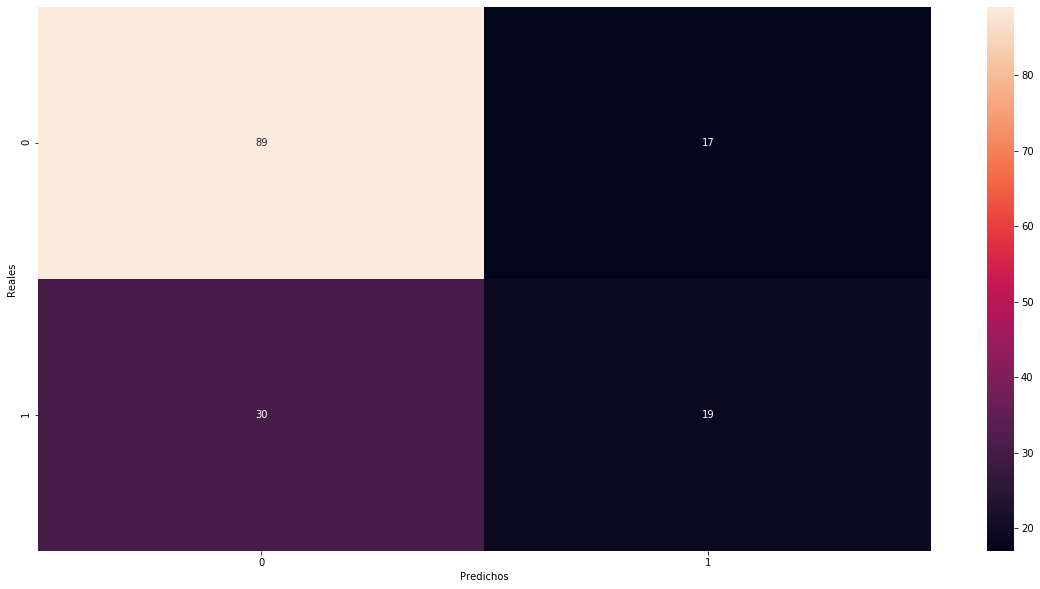

In [61]:
confusion_matrix(y_test,y_pred)

sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)


plt.ylabel('Reales')
plt.xlabel('Predichos');

In [62]:
### Modelo queda descartado porque falla en predecir cuando efectivamente factura mas de 500

# KNN 

In [63]:
model = KNeighborsClassifier(n_neighbors=3)

In [64]:
k_range = list(range(1, 31))
knn = KNeighborsClassifier()

In [65]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [66]:
GridSearchCV

sklearn.model_selection._search.GridSearchCV

In [67]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

In [68]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [69]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [70]:
pd.DataFrame(grid.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'split5_test_score', 'split6_test_score', 'split7_test_score',
       'split8_test_score', 'split9_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [71]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.037904,0.014925,0.017899,0.003947,1,{'n_neighbors': 1},0.638298,0.574468,0.553191,0.468085,0.553191,0.565217,0.521739,0.565217,0.434783,0.652174,0.552636,0.063271,30
1,0.023844,0.001035,0.017703,0.000750,2,{'n_neighbors': 2},0.723404,0.680851,0.680851,0.595745,0.638298,0.652174,0.630435,0.608696,0.543478,0.673913,0.642784,0.048851,26
2,0.025932,0.007237,0.018765,0.001163,3,{'n_neighbors': 3},0.553191,0.680851,0.617021,0.595745,0.659574,0.543478,0.673913,0.586957,0.543478,0.695652,0.614986,0.056135,28
3,0.024200,0.004159,0.018658,0.000457,4,{'n_neighbors': 4},0.617021,0.680851,0.659574,0.617021,0.617021,0.586957,0.739130,0.652174,0.521739,0.695652,0.638714,0.057871,27
4,0.024139,0.001161,0.019854,0.000825,5,{'n_neighbors': 5},0.574468,0.659574,0.638298,0.531915,0.638298,0.608696,0.565217,0.695652,0.500000,0.673913,0.608603,0.060768,29
5,0.024252,0.001673,0.019204,0.000603,6,{'n_neighbors': 6},0.638298,0.659574,0.702128,0.659574,0.659574,0.673913,0.630435,0.695652,0.652174,0.695652,0.666698,0.023385,21
6,0.022250,0.000474,0.018457,0.000811,7,{'n_neighbors': 7},0.659574,0.680851,0.680851,0.659574,0.659574,0.586957,0.652174,0.652174,0.608696,0.673913,0.651434,0.029017,24
7,0.022050,0.000690,0.018455,0.000506,8,{'n_neighbors': 8},0.680851,0.702128,0.680851,0.680851,0.659574,0.608696,0.652174,0.630435,0.652174,0.717391,0.666512,0.030948,23
8,0.029371,0.009051,0.018305,0.000643,9,{'n_neighbors': 9},0.680851,0.702128,0.638298,0.659574,0.680851,0.630435,0.586957,0.652174,0.586957,0.673913,0.649214,0.037083,25
9,0.028823,0.007508,0.019748,0.001709,10,{'n_neighbors': 10},0.680851,0.680851,0.638298,0.680851,0.680851,0.652174,0.608696,0.673913,0.695652,0.717391,0.670953,0.029090,20


In [72]:
grid.best_estimator_, grid.best_score_, grid.best_params_

(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                      weights='uniform'),
 0.677382053654024,
 {'n_neighbors': 16})

In [73]:
### Buscar porque la diferencia (Fernando)

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       106
           1       0.53      0.39      0.45        49

    accuracy                           0.70       155
   macro avg       0.64      0.61      0.62       155
weighted avg       0.68      0.70      0.68       155



In [75]:
print(confusion_matrix(y_test,y_pred))

[[89 17]
 [30 19]]


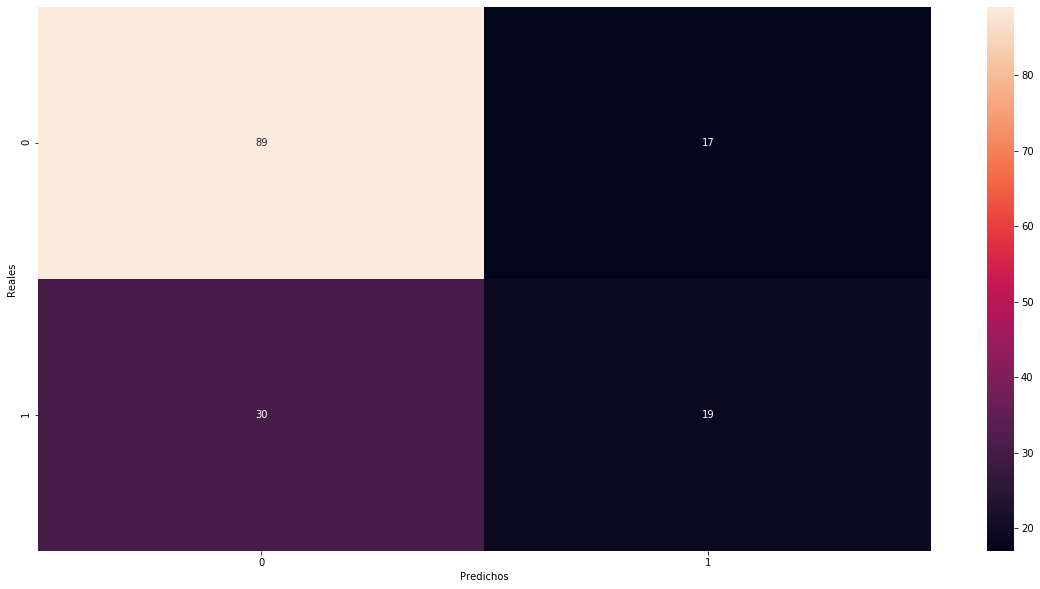

In [76]:
confusion_matrix(y_test,y_pred)

sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)


plt.ylabel('Reales')
plt.xlabel('Predichos');

# Gaussian Naive Bayes 

In [77]:
gnb1 = GaussianNB()
y_pred = gnb1.fit(X_train, y_train).predict(X_test)

In [78]:
accuracy_score(y_test,y_pred)

0.47096774193548385

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.34      0.47       106
           1       0.35      0.76      0.47        49

    accuracy                           0.47       155
   macro avg       0.55      0.55      0.47       155
weighted avg       0.62      0.47      0.47       155



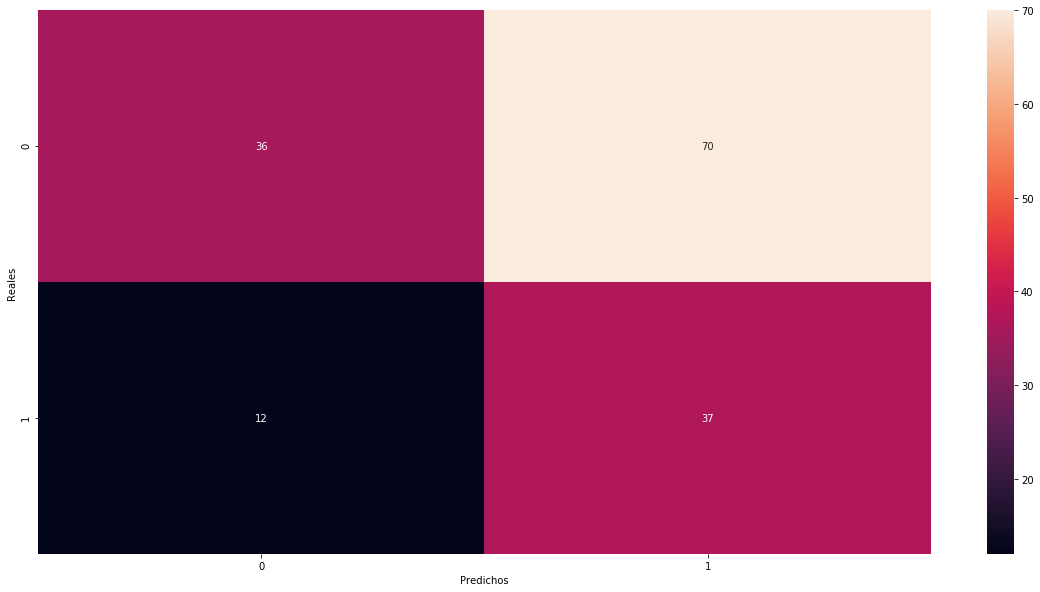

In [80]:
confusion_matrix(y_test,y_pred)

sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)


plt.ylabel('Reales')
plt.xlabel('Predichos');

# Bernoulli Naive Bayes

In [81]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()
bernoulli=clf.fit(X_train, y_train).predict(X_test)
bernu=accuracy_score(y_test,y_pred)
bernu

0.47096774193548385

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.34      0.47       106
           1       0.35      0.76      0.47        49

    accuracy                           0.47       155
   macro avg       0.55      0.55      0.47       155
weighted avg       0.62      0.47      0.47       155



In [83]:
print(confusion_matrix(y_test,y_pred))

[[36 70]
 [12 37]]


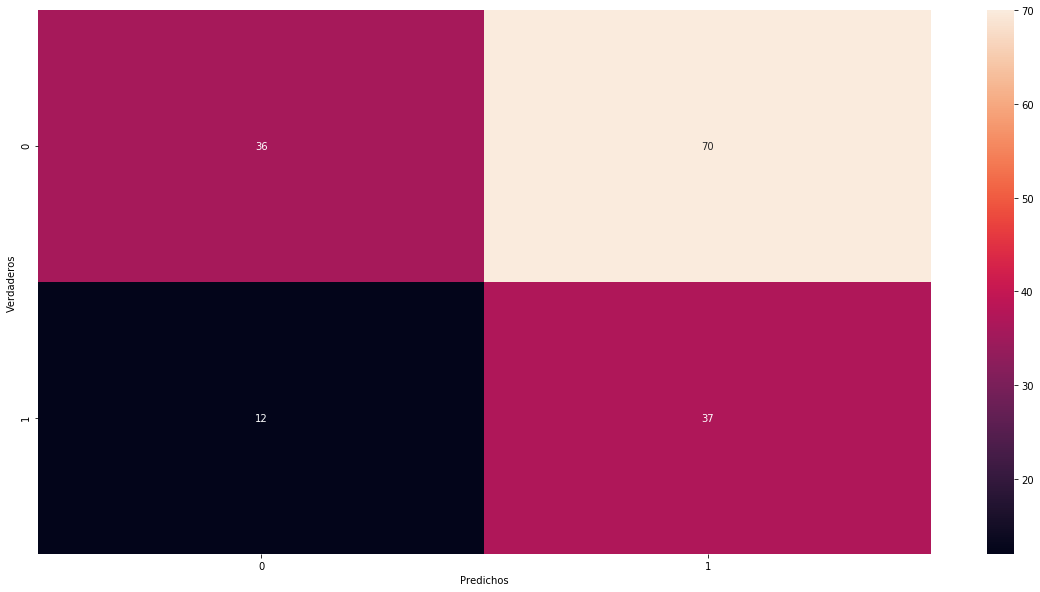

In [84]:
confusion_matrix(y_test,y_pred)

sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)


plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

# BOOSTING

In [85]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Adaboost - Gradient Boost - Arbol de decision

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [87]:
dt = DecisionTreeClassifier(class_weight='balanced', random_state=1)

In [88]:
ab = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1, random_state=1), n_estimators=100)
gb = GradientBoostingClassifier()

In [89]:
def evaluar_rendimiento(modelo, nombre, X_train, y_train, cv):
    s = cross_val_score(modelo, X_train, y_train, cv=cv, n_jobs=-1)
    print("Rendimiento de {}:\t{:0.3} ± {:0.3}".format( \
        nombre, s.mean().round(3), s.std().round(3)))


In [90]:
cv = StratifiedKFold(n_splits=3, random_state=41, shuffle=True)

In [91]:
evaluar_rendimiento(dt,"Árbol de decisión", X_train, y_train, cv)
evaluar_rendimiento(ab, "AdaBoostClassifier",  X_train, y_train, cv)
evaluar_rendimiento(gb, "GradientBoostingClassifier", X_train, y_train, cv)

Rendimiento de Árbol de decisión:	0.65 ± 0.052
Rendimiento de AdaBoostClassifier:	0.647 ± 0.031
Rendimiento de GradientBoostingClassifier:	0.7 ± 0.015


# Ahora con Gridsearch

### Ada Boost

In [92]:
from sklearn.model_selection import GridSearchCV

params_ab = {"n_estimators": [40, 50, 60, 70, 80, 90, 100],
          "learning_rate":[0.01, 0.1, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 2],
        "base_estimator__max_depth": [1, 2, 3]}

grid_ab = GridSearchCV(AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), 
                       param_grid=params_ab, cv=cv, verbose=1, n_jobs=3)

In [93]:
%timeit
grid_ab.fit(X_train, y_train)

Fitting 3 folds for each of 189 candidates, totalling 567 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    7.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:   26.4s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:  1.0min
[Parallel(n_jobs=3)]: Done 567 out of 567 | elapsed:  1.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=41, shuffle=True),
             error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                               

In [94]:
grid_ab.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [95]:
evaluar_rendimiento(grid_ab.best_estimator_,  "AdaBoostClassifier + GS", X_train, y_train, cv)

Rendimiento de AdaBoostClassifier + GS:	0.737 ± 0.023


In [96]:
prediction.drop(columns='etiqueta', inplace= True)

In [97]:
prediction.drop(columns=['gid','AVG','Latitud','Longitud','sentido','cod_ruta','geometry','cuartil_vol_ventas'], inplace=True)

### Predicciones con estaciones que el modelo no conoce 

In [98]:
grid_ab.predict(prediction)

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

### Gradient Boosting

In [99]:
params_gb = {'n_estimators':[30, 40, 50, 60, 70, 80, 90, 100,110, 120, 130, 140, 150, 500] , 
             'learning_rate':[0.001, 0.001, 0.1,0.11, 0.12, 0.13, 0.14, 0.15,0.2, 1.0],
            'max_depth' : [1, 2, 3, 4]}

grid_gb = GridSearchCV(gb, param_grid=params_gb, cv=cv, verbose=1, n_jobs=3)

In [100]:
grid_gb.fit(X_train, y_train)

Fitting 3 folds for each of 560 candidates, totalling 1680 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    3.6s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:   16.7s
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:   36.3s
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed:  1.1min
[Parallel(n_jobs=3)]: Done 1244 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done 1680 out of 1680 | elapsed:  2.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=41, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  mi...
                                                  subsample=1.0, tol=0.0001,
                           

In [101]:
grid_gb.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=40,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [102]:
evaluar_rendimiento(grid_gb.best_estimator_, "GradientBoostingClassifier + GS", X_train, y_train, cv)

Rendimiento de GradientBoostingClassifier + GS:	0.712 ± 0.014


### Predicciones con estaciones que el modelo no conoce 

In [103]:
grid_gb.predict(prediction)

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

## Analisis de las features mas importantes

In [104]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Shap de Random Forest

In [105]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

In [106]:
my_model.score(val_X,val_y)

0.6709677419354839

In [107]:
y_predicted_rf=my_model.predict_proba(val_X)
y_predicted_rf

array([[0.65      , 0.35      ],
       [0.96      , 0.04      ],
       [0.97      , 0.03      ],
       [0.88466667, 0.11533333],
       [0.52      , 0.48      ],
       [0.825     , 0.175     ],
       [0.75      , 0.25      ],
       [0.978     , 0.022     ],
       [0.89      , 0.11      ],
       [0.13      , 0.87      ],
       [0.1       , 0.9       ],
       [0.9       , 0.1       ],
       [0.05      , 0.95      ],
       [0.25652778, 0.74347222],
       [0.61333333, 0.38666667],
       [0.15      , 0.85      ],
       [0.86      , 0.14      ],
       [0.49      , 0.51      ],
       [0.65      , 0.35      ],
       [0.975     , 0.025     ],
       [0.96      , 0.04      ],
       [0.815     , 0.185     ],
       [0.42      , 0.58      ],
       [0.3675    , 0.6325    ],
       [0.785     , 0.215     ],
       [0.99      , 0.01      ],
       [0.6425    , 0.3575    ],
       [0.86      , 0.14      ],
       [0.805     , 0.195     ],
       [0.395     , 0.605     ],
       [0.

### Predicciones con estaciones que el modelo no conoce

In [108]:
my_model.predict(prediction)

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [109]:
val_X.head()

,ruta,MaximoPrecio2019Super,20132014,20142015,20152016,Hectsembradas,Superficiekm,Poblacion,tmda17,eess_por_tramo,...,NEUQUEN,RIO NEGRO,SALTA,SAN JUAN,SAN LUIS,SANTA CRUZ,SANTA FE,SANTIAGO DEL ESTERO,TIERRA DEL FUEGO,TUCUMAN
314,7,58.340000,0.106786,0.047852,0.048654,257394.76,76748,432310,3850,1,...,0,0,0,0,1,0,0,0,0,0
162,3,57.990002,0.074044,0.029770,0.032685,3263625.67,307571,15625084,2910,4,...,0,0,0,0,0,0,0,0,0,0
201,12,60.939999,0.101571,0.046251,0.046823,11278.47,29801,1101593,7600,4,...,0,0,0,0,0,0,0,0,0,0
289,3,58.889999,0.074044,0.029770,0.032685,3263625.67,307571,15625084,2500,3,...,0,0,0,0,0,0,0,0,0,0
23,35,48.189999,0.072495,0.028545,0.033351,307862.70,14344,318951,1620,1,...,0,0,0,0,0,0,0,0,0,0


In [110]:
val_y.head()

314    0
162    0
201    0
289    0
23     1
Name: etiqueta, dtype: int64

### Local

In [111]:
data_for_prediction = val_X.iloc[0]  
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

In [112]:
my_model.predict_proba(data_for_prediction_array)

array([[0.65, 0.35]])

In [113]:
import shap  
shap.initjs()

In [114]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [115]:
shap.force_plot(explainer.expected_value[0], shap_values[0], data_for_prediction)

In [116]:
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

### Global

In [117]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_X)

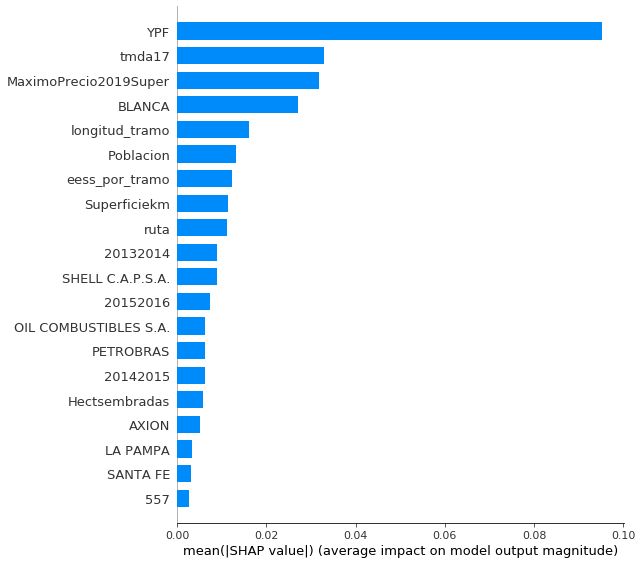

In [118]:
shap.summary_plot(shap_values[1], val_X, plot_type="bar")


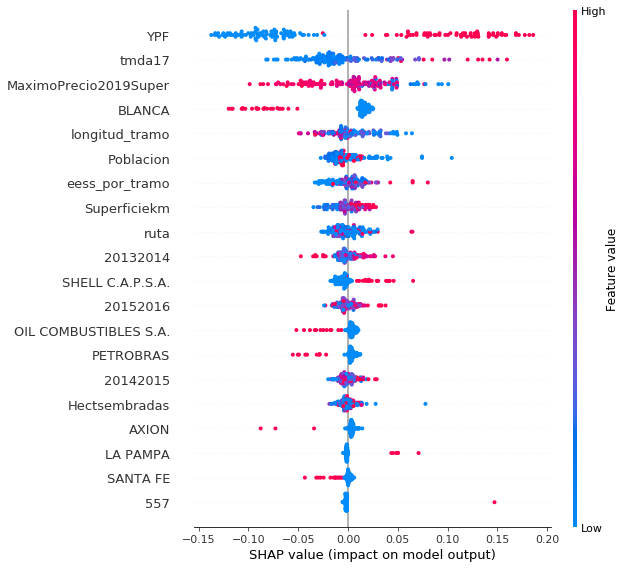

In [119]:
# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], val_X)

### Dependence plot

In [120]:
df1.columns

Index([                  'AVG',              'Longitud',
                     'Latitud',                  'ruta',
       'MaximoPrecio2019Super',              '20132014',
                    '20142015',              '20152016',
               'Hectsembradas',          'Superficiekm',
       ...
                     'NEUQUEN',             'RIO NEGRO',
                       'SALTA',              'SAN JUAN',
                    'SAN LUIS',            'SANTA CRUZ',
                    'SANTA FE',   'SANTIAGO DEL ESTERO',
            'TIERRA DEL FUEGO',               'TUCUMAN'],
      dtype='object', length=401)

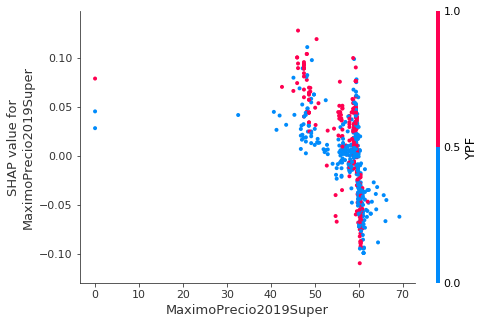

In [121]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X)

shap.dependence_plot('MaximoPrecio2019Super', shap_values[1], X)

shap.force_plot(explainer.expected_value[0], shap_values[0],X)

### Shap con Gradient Boosting (uno de los que mejor que nos dio)

In [122]:
grid_gb

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=41, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  mi...
                                                  subsample=1.0, tol=0.0001,
                           

In [123]:
### Local

In [124]:
data_for_prediction = X_test.iloc[0]  
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

In [125]:
grid_gb.predict_proba(data_for_prediction_array)

array([[0.84727733, 0.15272267]])

In [126]:
# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

In [127]:
shap.force_plot(explainer.expected_value[0], shap_values[0], data_for_prediction)

In [128]:
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

In [129]:
### GLobal

In [130]:
# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test, check_additivity=False)

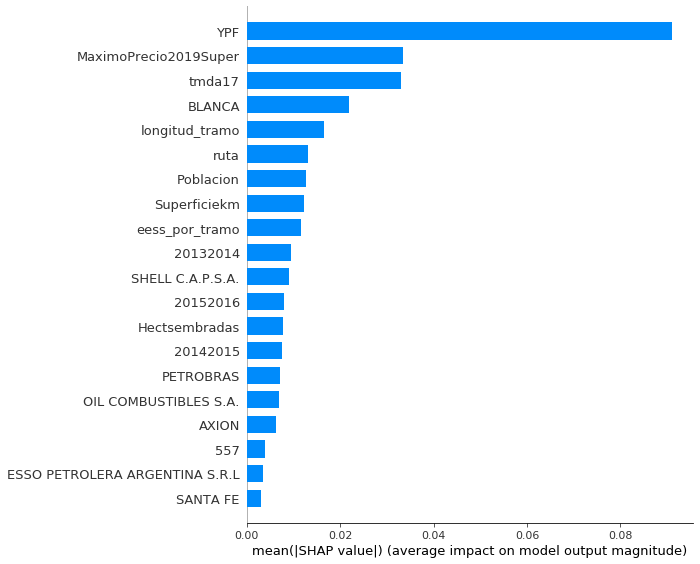

In [131]:
shap.summary_plot(shap_values[1], X_test, plot_type="bar")


## Shap con Adaboost (el mejor que nos dio)

In [133]:
grid_ab

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=41, shuffle=True),
             error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                               

In [134]:
data_for_prediction = X_test.iloc[0]  
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)

In [135]:
y_predicted_ab=grid_ab.predict_proba(data_for_prediction_array)

In [136]:
# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

In [137]:
shap.force_plot(explainer.expected_value[0], shap_values[0], data_for_prediction)

In [138]:
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

In [139]:
### GLobal

In [140]:
# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test,check_additivity=False)

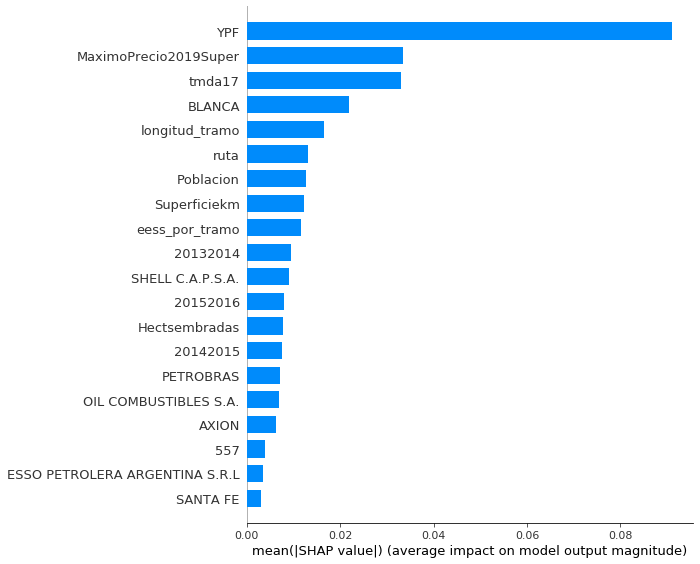

In [141]:
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

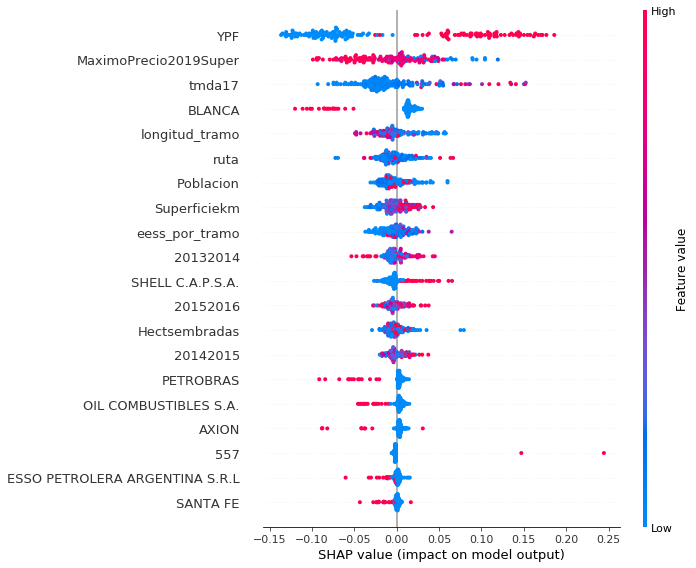

In [142]:
# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_test)

## XGBoost

In [143]:
from xgboost.sklearn import XGBClassifier
model_xg = XGBClassifier(n_jobs=-1)

In [144]:
import scipy.stats as st

In [145]:
one_to_left = st.beta(10, 1) # Esta distribución nos dará valores entre 0 y 1 mayormente cercanos a 1

In [146]:
params = {  
    "n_estimators": st.randint(20,40), # Number of boosted trees to fit.
    'reg_alpha': st.uniform(0.05,10),   # L1 regularization term on weights
    "max_depth": st.randint(3, 12),     # Maximum tree depth for base learners.
    "learning_rate": st.uniform(0.05, 0.4), #     Boosting learning rate (xgb’s “eta”)

    "colsample_bytree": one_to_left, #     Subsample ratio of columns when constructing each tree.
    "subsample": one_to_left,     # Subsample ratio of the training instance.
    "gamma": st.uniform(0, 10), #     Minimum loss reduction required to make a further partition on a leaf node of the tree.
    "min_child_weight": st.uniform(1,20), #    Minimum sum of instance weight(hessian) needed in a child.
}


In [147]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import time
import numpy as np
from scikitplot.metrics import plot_roc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

In [148]:
xgb = RandomizedSearchCV(model_xg,params, n_iter=25, verbose= True)

In [149]:
start = time.time()
xgb.fit(X_train,y_train)
end = time.time()
print("La búsqueda con XGBoost llevó: ", end - start, " segundos")

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


La búsqueda con XGBoost llevó:  20.233649253845215  segundos


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   20.0s finished


In [150]:
y_predicted_xgb = xgb.predict_proba(X_test)

In [151]:
xgb_auc = roc_auc_score(y_test,y_predicted_xgb[:,1])
print("El valor del AUC es: ", xgb_auc)

El valor del AUC es:  0.7046030090868465


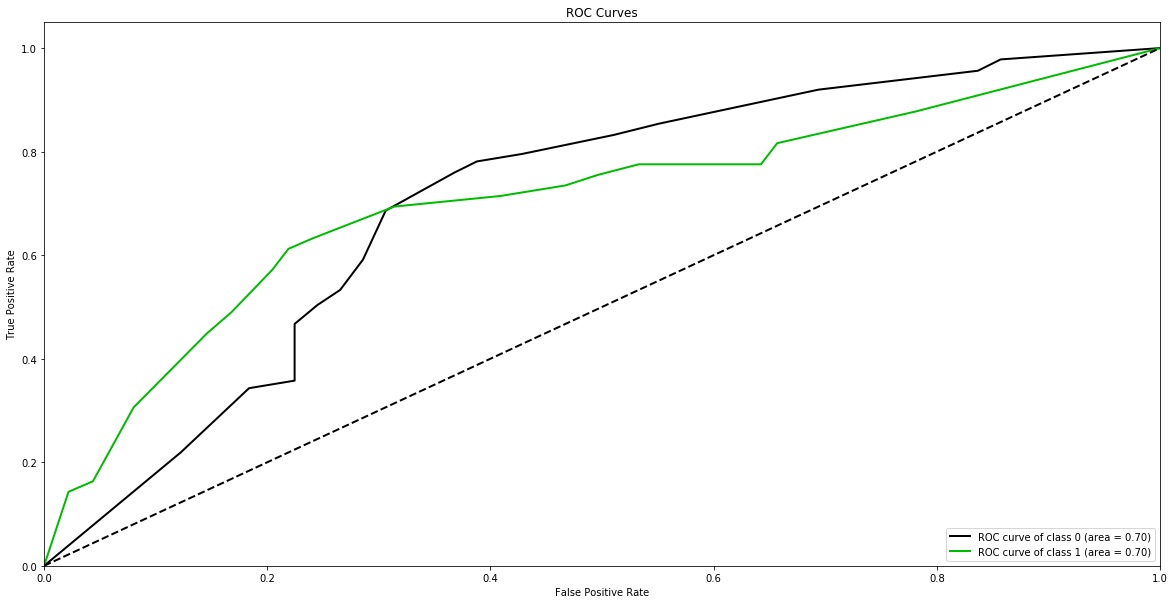

In [152]:
plot_roc(y_test,y_predicted_xgb, plot_micro = False, plot_macro= False)

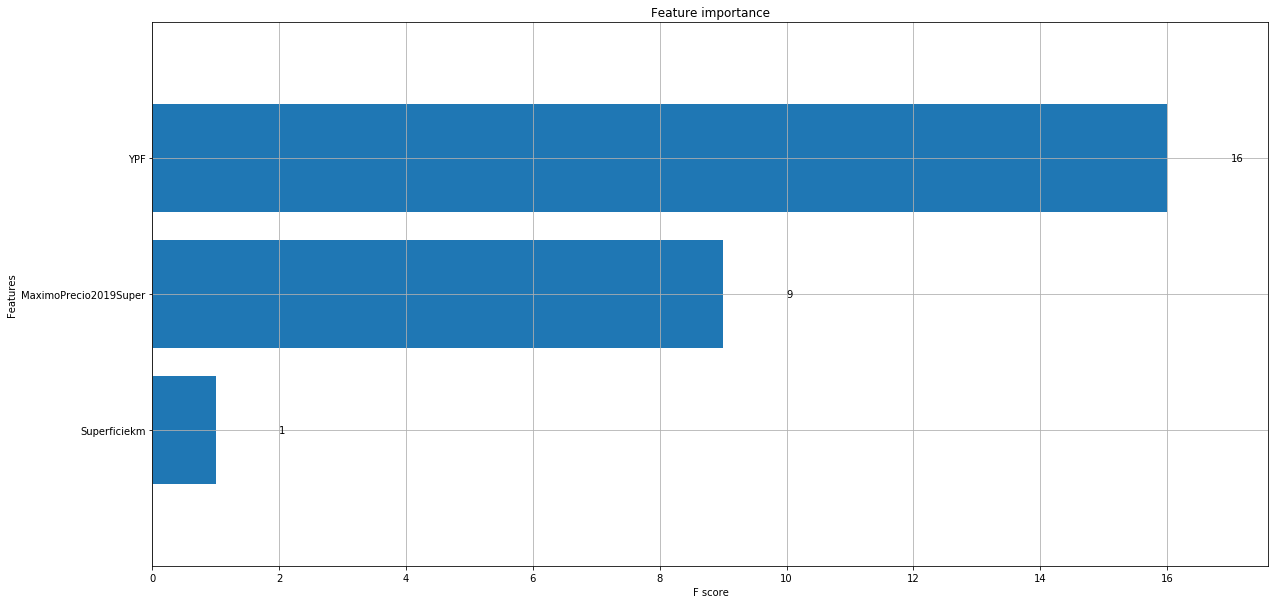

In [153]:
from xgboost import plot_importance
plot_importance(xgb.best_estimator_, height = 0.8,max_num_features=5);

### LightGBM

In [154]:
import lightgbm as lgb
model_lgb = lgb.LGBMClassifier()

In [155]:
lgbm = RandomizedSearchCV(model_lgb, params, n_iter = 25, verbose= True)

In [156]:
start = time.time()
lgbm.fit(X_train, y_train)
end = time.time()
print("La búsqueda con LightGBM llevó: ", end - start, " segundos")

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


La búsqueda con LightGBM llevó:  8.375059127807617  segundos


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    8.2s finished


In [157]:
opt_lgbm = lgbm.predict_proba(X_test)

In [158]:
y_predicted_lgbm = lgbm.predict_proba(X_test)

In [159]:
lgbm_auc = roc_auc_score(y_test,y_predicted_lgbm[:,1])
print("El valor del AUC es: ", lgbm_auc)

El valor del AUC es:  0.6934306569343064


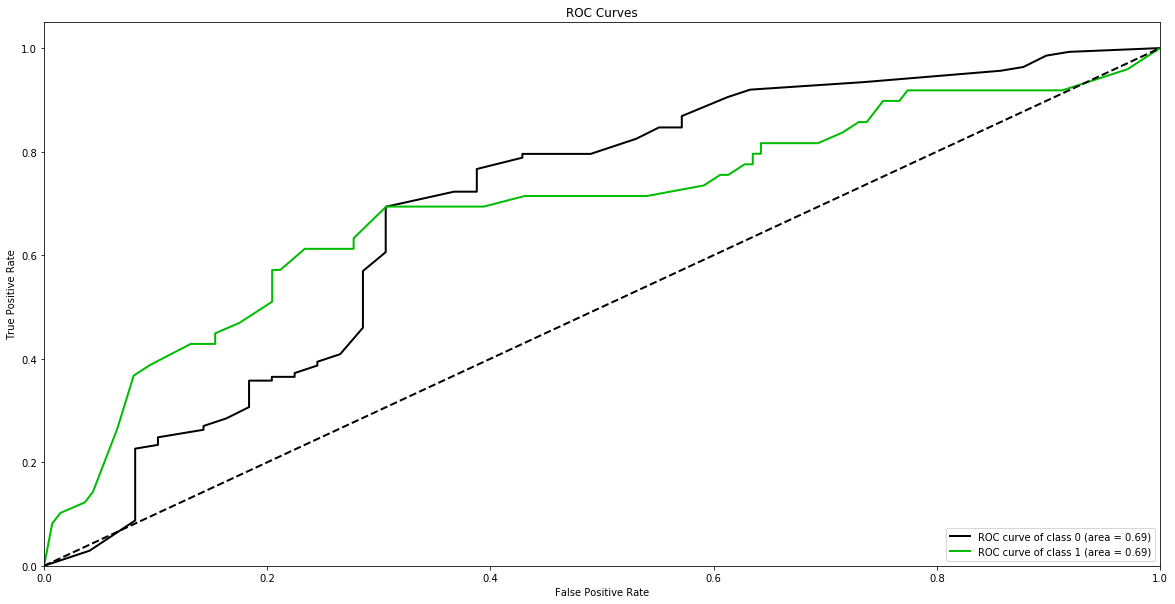

In [160]:
plot_roc(y_test,y_predicted_lgbm, plot_micro = False, plot_macro= False)

In [161]:
from catboost import CatBoostClassifier
model_cat = CatBoostClassifier()

In [162]:
model_cat.fit(X_train, y_train)

Learning rate set to 0.007213
0:	learn: 0.6902546	total: 82.1ms	remaining: 1m 21s
1:	learn: 0.6874333	total: 87.9ms	remaining: 43.9s
2:	learn: 0.6844096	total: 92.5ms	remaining: 30.7s
3:	learn: 0.6821665	total: 96.9ms	remaining: 24.1s
4:	learn: 0.6791586	total: 101ms	remaining: 20.2s
5:	learn: 0.6766100	total: 107ms	remaining: 17.7s
6:	learn: 0.6735470	total: 112ms	remaining: 15.8s
7:	learn: 0.6709505	total: 116ms	remaining: 14.4s
8:	learn: 0.6686135	total: 121ms	remaining: 13.3s
9:	learn: 0.6663492	total: 126ms	remaining: 12.4s
10:	learn: 0.6641550	total: 130ms	remaining: 11.7s
11:	learn: 0.6614127	total: 135ms	remaining: 11.1s
12:	learn: 0.6589618	total: 140ms	remaining: 10.6s
13:	learn: 0.6564167	total: 146ms	remaining: 10.3s
14:	learn: 0.6542568	total: 152ms	remaining: 9.96s
15:	learn: 0.6519867	total: 157ms	remaining: 9.64s
16:	learn: 0.6497025	total: 163ms	remaining: 9.43s
17:	learn: 0.6474965	total: 169ms	remaining: 9.2s
18:	learn: 0.6451879	total: 175ms	remaining: 9.02s
19:	lea

In [163]:
y_predicted_cat = model_cat.predict_proba(X_test)

In [164]:
cat_auc = roc_auc_score(y_test,y_predicted_cat[:,1])
print("El valor del AUC es: ", cat_auc)

El valor del AUC es:  0.6993892447489946


In [165]:
print("Los resultados finales fueron: \n - AUC de XGBoost:", xgb_auc, "\n - AUC de LightGBM:", lgbm_auc, "\n - AUC de CatBoost:", cat_auc)


Los resultados finales fueron: 
 - AUC de XGBoost: 0.7046030090868465 
 - AUC de LightGBM: 0.6934306569343064 
 - AUC de CatBoost: 0.6993892447489946


In [166]:
df.iloc[623],df.iloc[627]

(code                                                                  9544
 Provincia_x                                                       LA PAMPA
 Localidad_x                                                        REALICO
 Operador_x                                               LA PAMPAGONIA SRL
 Bandera_x                                                              YPF
 AVG                                                                1110.18
 Longitud                                                          -64.2534
 Latitud                                                           -35.0533
 ruta                                                                   188
 MaximoPrecio2019Super                                                48.99
 20132014                                                         0.0724948
 20142015                                                         0.0285447
 20152016                                                         0.0333509
 Hectsembrad